In [1]:
import os

import pandas as pd

from matplotlib import pyplot as plt
from matplotlib_venn import venn2

In [2]:
DATA_DIR = "../data/"

## 1. Taxon to media sources

### KOMODO

* **komodo_taxa.txt**: downloaded from [KOMODO](https://komodo.modelseed.org/servlet/KomodoTomcatServerSideUtilitiesModelSeed?OrganismMedia)

* **komodo_media.txt**: downloaded from [KOMODO](https://komodo.modelseed.org/servlet/KomodoTomcatServerSideUtilitiesModelSeed?MediaList)

In [3]:
komodo_taxa = pd.read_table(
    os.path.join(
        DATA_DIR,
        "komodo",
        "komodo_taxa.txt"
    )
)

komodo_taxa["taxon_id"] = komodo_taxa["taxon_id"]\
    .astype(str)\
    .replace(r".0$", "", regex=True)

komodo_taxa

,dsmz_id,taxon_id,organism_name,media_name
0,6268,nan,NaN,Substrate for DSM 6268
1,9849,46125,Abiotrophia defectiva,PYG-MEDIUM (modified)
2,14247,291968,Acaricomes phytoseiuli,TRYPTICASE SOY Yeast extract medium
3,23669,nan,Acetatifactor muris,For DSM 23669
4,5522,2382,Acetitomaculum ruminis,ACETITOMACULUM medium | METHANOBACTERIUM medium
...,...,...,...,...
8623,473,120045,Zymomonas mobilis subsp. mobilis,ZYMOMONAS medium
8624,22645,120044,Zymomonas mobilis subsp. pomaceae,ZYMOMONAS medium
8625,7201,86958,Zymophilus paucivorans,MEDIUM 58 MODIFIED FOR DSM 7201
8626,20765,86959,Zymophilus raffinosivorans,MEDIUM 58 MODIFIED FOR DSM 20765


In [4]:
komodo_media = pd.read_table(
    os.path.join(
        DATA_DIR,
        "komodo",
        "komodo_media.txt"
    )
)
komodo_media

,media_id,media_name,ph,complex,aerobic,submedium,instructions
0,1,NUTRIENT AGAR,7.0,True,False,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
1,10,ZYMOMONAS medium,NaN,True,False,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
2,1000,MJANHOX-NO3 MEDIUM WITH SUPPLEMENT,7.5 - 8.0,False,True,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
3,1001,BASAL MEDIUM,6.8 - 7,False,True,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
4,1002,ECTOTHIORHODOSYNUS medium,9 - 9.5,True,False,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
...,...,...,...,...,...,...,...
3632,9_53191,MEDIUM 9 MODIFIED FOR DSM 53191,NaN,True,False,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
3633,9_53271,MEDIUM 9 MODIFIED FOR DSM 53271,NaN,True,False,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
3634,9_53343,MEDIUM 9 MODIFIED FOR DSM 53343,NaN,True,False,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
3635,9_53796,MEDIUM 9 MODIFIED FOR DSM 53796,NaN,True,False,False,http://www.dsmz.de/microorganisms/medium/pdf/D...


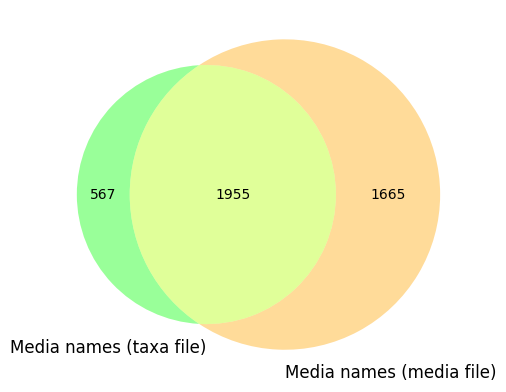

In [7]:
venn2(
    subsets=[
        set(komodo_taxa["media_name"]),
        set(komodo_media["media_name"])
    ],
    set_labels=[
        "Media names (taxa file)",
        "Media names (media file)"
    ],
    set_colors=[
        "lime",
        "orange"
    ]
)

In [9]:
komodo_df = pd.merge(
    left=komodo_taxa,
    right=komodo_media,
    on="media_name",
    how="inner"
)

komodo_df.to_csv(
    os.path.join(
        DATA_DIR,
        "processed",
        "komodo.csv"
    ),
    sep=";",
    index=False
)

komodo_df

,dsmz_id,taxon_id,organism_name,media_name,media_id,ph,complex,aerobic,submedium,instructions
0,6268,nan,NaN,Substrate for DSM 6268,500.4,7 - 7.2,True,True,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
1,9849,46125,Abiotrophia defectiva,PYG-MEDIUM (modified),104,"7.2, NaOH",True,True,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
2,14247,291968,Acaricomes phytoseiuli,TRYPTICASE SOY Yeast extract medium,92,7.0 - 7.2,True,False,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
3,23669,nan,Acetatifactor muris,For DSM 23669,339.3,6.0 - 7.4,False,True,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
4,1870,35830,Acetivibrio cellulolyticus,ACETIVIBRIO CELLULOLYTICUS MEDIUM,165,7.2,False,True,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
...,...,...,...,...,...,...,...,...,...,...
7124,473,120045,Zymomonas mobilis subsp. mobilis,ZYMOMONAS medium,10,NaN,True,False,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
7125,22645,120044,Zymomonas mobilis subsp. pomaceae,ZYMOMONAS medium,10,NaN,True,False,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
7126,7201,86958,Zymophilus paucivorans,MEDIUM 58 MODIFIED FOR DSM 7201,58_7201,NaN,True,False,False,http://www.dsmz.de/microorganisms/medium/pdf/D...
7127,20765,86959,Zymophilus raffinosivorans,MEDIUM 58 MODIFIED FOR DSM 20765,58_20765,NaN,True,False,False,http://www.dsmz.de/microorganisms/medium/pdf/D...


### MediaDive

## 2. EC number sources

### UniProt

### KEGG